# Call dependencies and initial variables

In [1]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential 
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

/Users/sannujsinghal/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_path = 'DatasetOfRaces/train'
valid_path = 'DatasetOfRaces/valid'
test_path = 'DatasetOfRaces/test'

In [3]:
#train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale', 'AsianMale', 'AsianFemale', 'CaucasianMale', 'CaucasianFemale', 'HispanicMale', 'HispanicFemale'], batch_size=50)
#valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale', 'AsianMale', 'AsianFemale', 'CaucasianMale', 'CaucasianFemale', 'HispanicMale', 'HispanicFemale'], batch_size=25)
#test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale', 'AsianMale', 'AsianFemale', 'CaucasianMale', 'CaucasianFemale', 'HispanicMale', 'HispanicFemale'], batch_size=40)

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale'], batch_size=50)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale'], batch_size=25)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale'], batch_size=10)

Found 100 images belonging to 2 classes.
Found 50 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [4]:
def plots(ims, figsize=(40,24), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

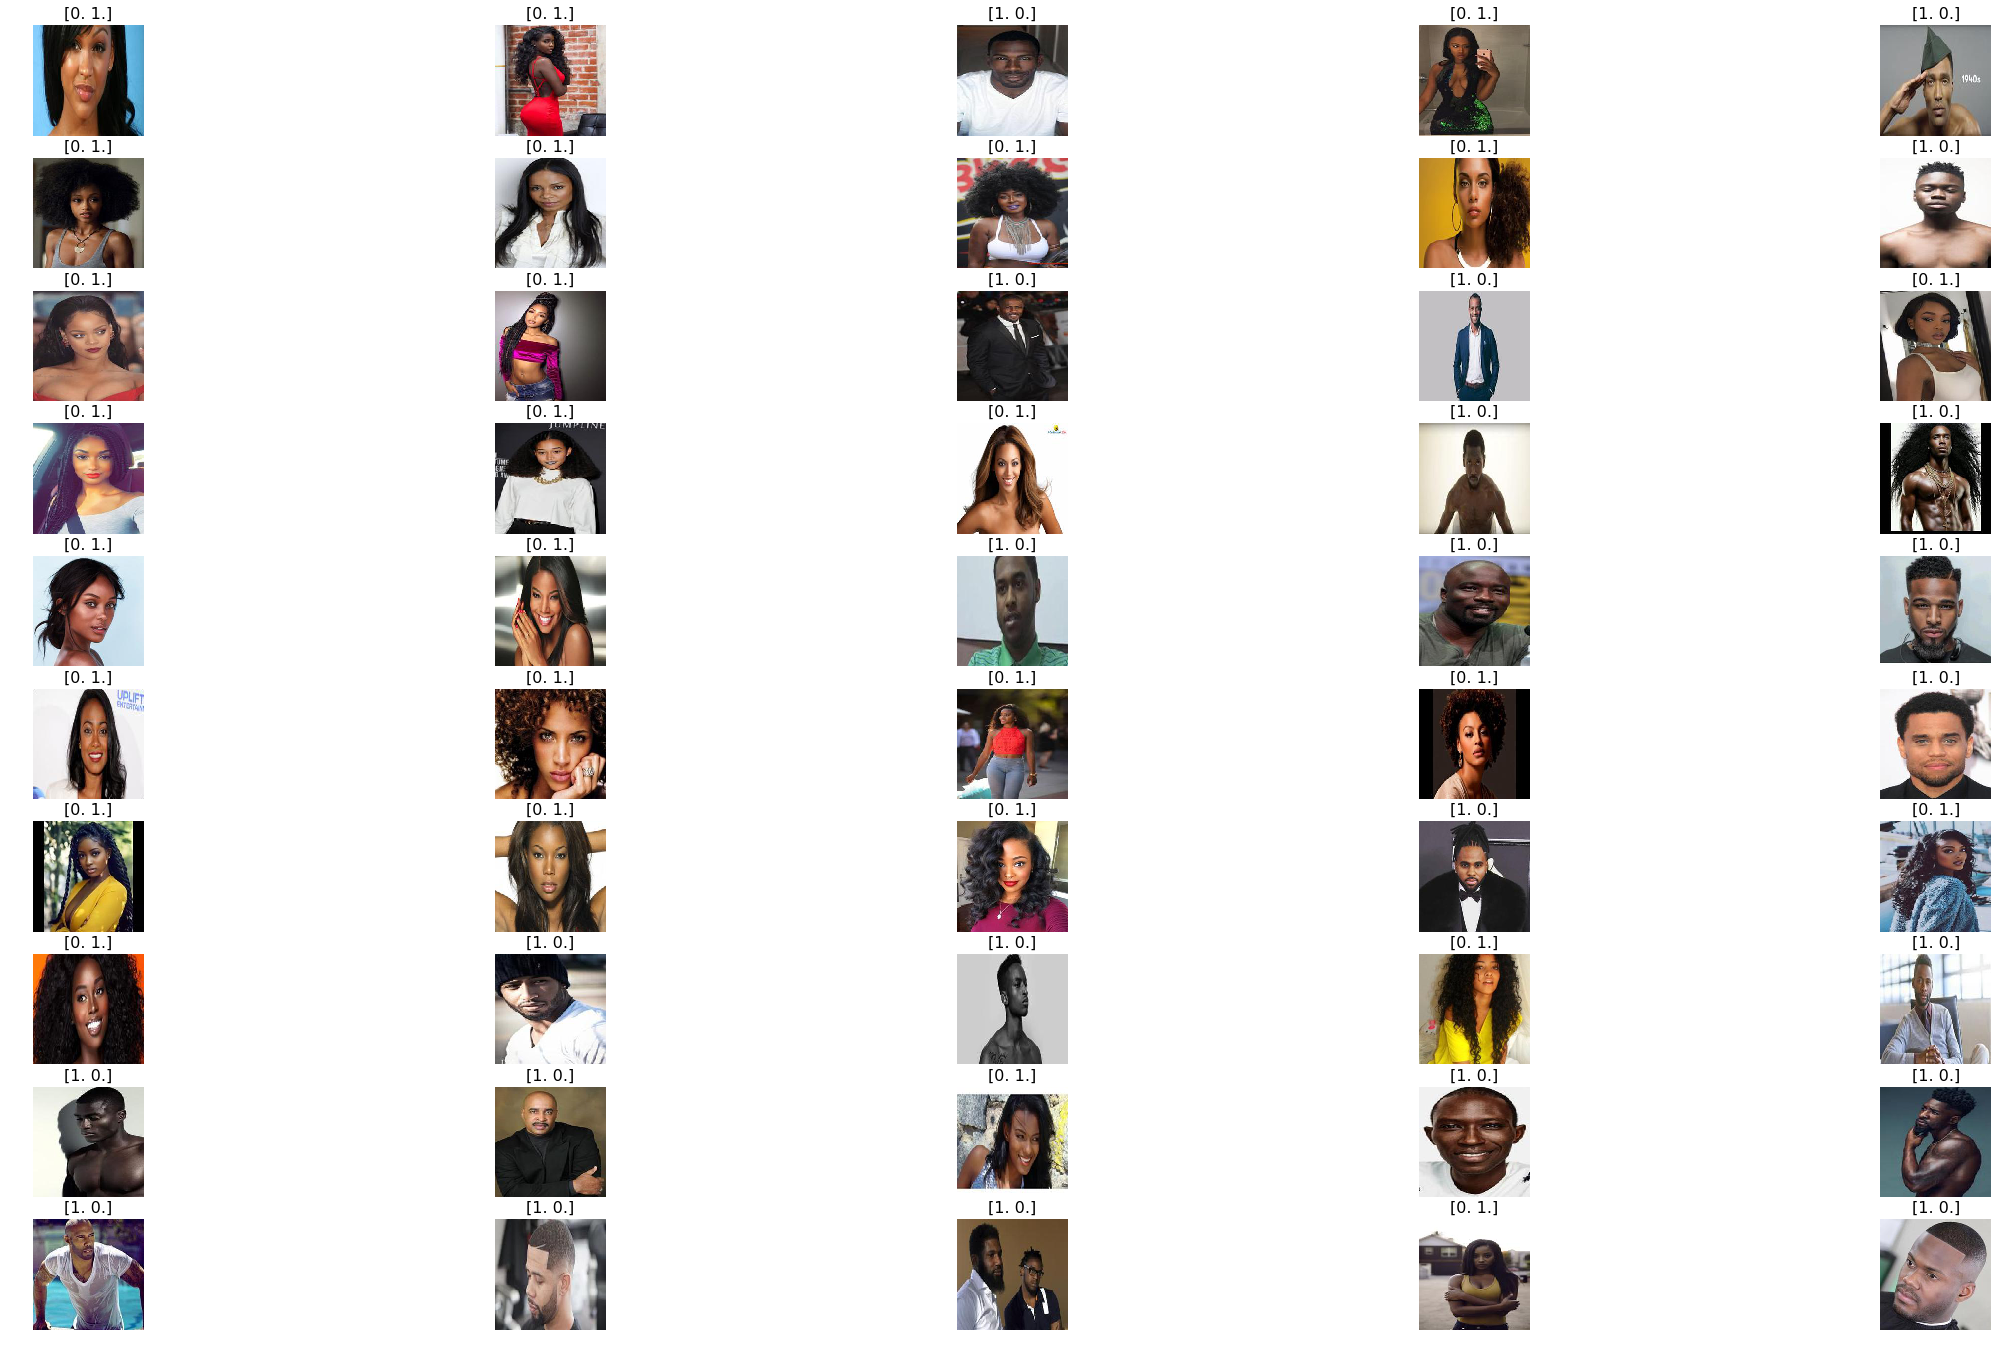

In [6]:
plots(imgs, titles=labels)

In [7]:
model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(2, activation='softmax'),
    ])

In [8]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit_generator(train_batches, steps_per_epoch=2, 
                    validation_data=valid_batches, validation_steps=2, epochs=5, verbose=2)

Epoch 1/5
 - 6s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 5s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/5
 - 4s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/5
 - 4s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 4s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


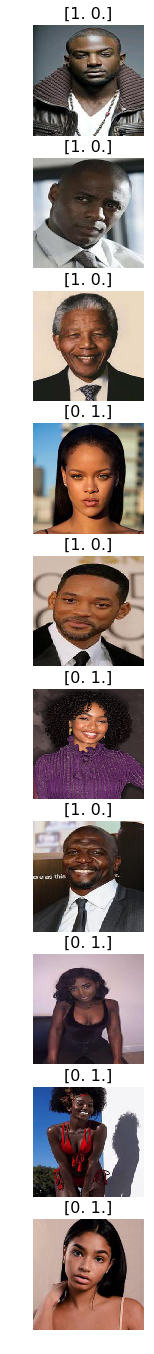

In [10]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [11]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 0., 1., 0., 1., 0., 0., 0.], dtype=float32)

In [12]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [13]:
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [14]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 0]
 [5 0]]


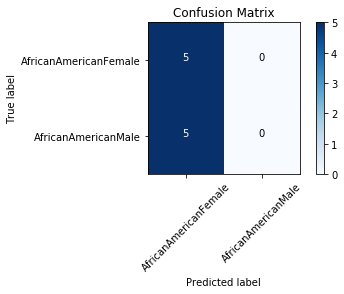

In [17]:
cm_plot_labels = ['AfricanAmericanFemale', 'AfricanAmericanMale']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [28]:
vgg16_model = keras.applications.vgg16.VGG16()

In [29]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [30]:
type(vgg16_model)

keras.engine.training.Model

In [31]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [33]:
model.layers.pop()

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [35]:
for layer in model.layers:
    layer.trainable = False

In [36]:
model.add(Dense(2, activation='softmax'))

In [37]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [38]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit_generator(train_batches, steps_per_epoch=2, 
                    validation_data=valid_batches, validation_steps=2, epochs=5, verbose=2)

Epoch 1/5
 - 107s - loss: 0.6903 - acc: 0.6000 - val_loss: 0.6890 - val_acc: 0.6400
Epoch 2/5
 - 93s - loss: 0.6861 - acc: 0.7200 - val_loss: 0.6862 - val_acc: 0.6600
Epoch 3/5
 - 95s - loss: 0.6825 - acc: 0.8000 - val_loss: 0.6839 - val_acc: 0.7800
Epoch 4/5
 - 93s - loss: 0.6794 - acc: 0.8500 - val_loss: 0.6820 - val_acc: 0.8000
Epoch 5/5
 - 94s - loss: 0.6766 - acc: 0.9000 - val_loss: 0.6804 - val_acc: 0.8000


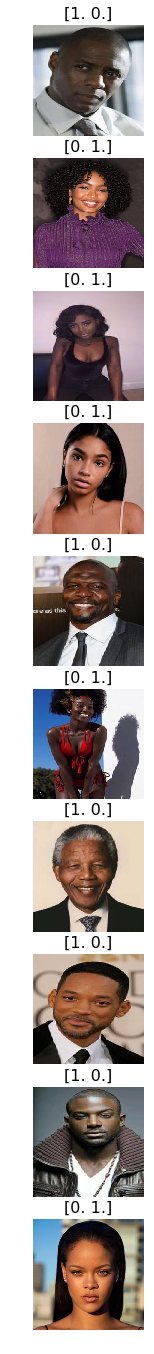

In [40]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [41]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 0., 0., 1., 0., 1., 1., 1., 0.], dtype=float32)

In [64]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [65]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[3 2]
 [1 4]]


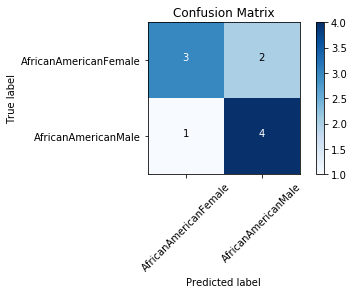

In [66]:
cm_plot_labels = ['AfricanAmericanFemale', 'AfricanAmericanMale']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')